Deoxyfluorination with Sulfonyl Fluorides Published in JACS https://doi.org/10.1021/jacs.8b01523
Yield Prediction using Random Forest and XGBoost
                                                                                

In [20]:
# import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
data = pd.read_csv(r"C:\Users\Gashaw\Documents\R_input\descriptor_table.csv")
X_data = data.drop(['yield'], axis =1) # the 23 descriptors and their values
y_data = data['yield'] # Yield of the 640 rows is stored in the y_data variable


In [2]:
X_data

,alcohol_*C1_electrostatic_charge,alcohol_*C1_exposed_area,alcohol_electronegativity,alcohol_primary,alcohol_secondary,alcohol_tertiary,alcohol_cyclic,alcohol_4-membered_ring,alcohol_5-membered_ring,alcohol_6-membered_ring,...,alcohol_homobenzylic,alcohol_homoallylic,alcohol_alpha-carbonyl,alcohol_beta_carbonyl,alcohol_hemiacetal,alcohol_alpha amino,base_*N1_exposed_area,sulfonyl_fluoride_*S1_electrostatic_charge,sulfonyl_fluoride_*F1_electrostatic_charge,sulfonyl_fluoride_*O1_electrostatic_charge
0,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.973,-0.210,-0.439
1,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.849,-0.198,-0.401
2,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.978,-0.208,-0.436
3,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.973,-0.204,-0.430
4,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.926,-0.162,-0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,0,1,0,5.305,0.973,-0.210,-0.439
636,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,0,1,0,5.305,0.849,-0.198,-0.401
637,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,0,1,0,5.305,0.978,-0.208,-0.436
638,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,0,1,0,5.305,0.973,-0.204,-0.430


In [3]:
# get informatiom about the descriptors
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   alcohol_*C1_electrostatic_charge            640 non-null    float64
 1   alcohol_*C1_exposed_area                    640 non-null    float64
 2   alcohol_electronegativity                   640 non-null    float64
 3   alcohol_primary                             640 non-null    int64  
 4   alcohol_secondary                           640 non-null    int64  
 5   alcohol_tertiary                            640 non-null    int64  
 6   alcohol_cyclic                              640 non-null    int64  
 7   alcohol_4-membered_ring                     640 non-null    int64  
 8   alcohol_5-membered_ring                     640 non-null    int64  
 9   alcohol_6-membered_ring                     640 non-null    int64  
 10  alcohol_7-memb

In [4]:
y_data

0      42
1      48
2      47
3      52
4      52
       ..
635    14
636    23
637    36
638    44
639    45
Name: yield, Length: 640, dtype: int64

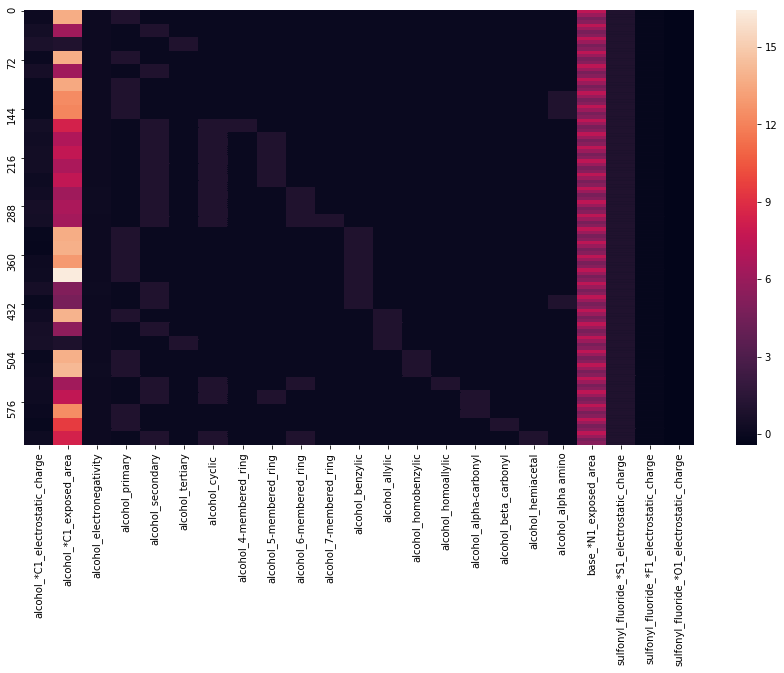

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_data,yticklabels=72)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,test_size = 0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [7]:
# Data preprocessing
pipe = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', rf)])

In [8]:
# Model Training and prediction
pipe.fit(X_train,y_train) # training using 70% of the data
predicted_yield = pipe.predict(X_valid) # predicting yield for 30% of the data

In [9]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 8.458039075341281


In [10]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.9087745048852928


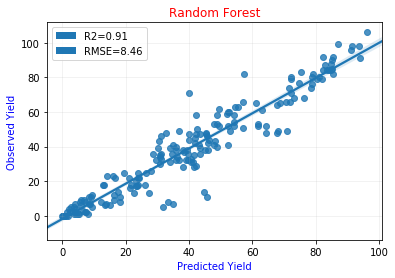

In [11]:
sn.regplot(x=predicted_yield , y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

In [12]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.7774 ± 0.1094,alcohol_*C1_exposed_area
0.2890 ± 0.0605,alcohol_*C1_electrostatic_charge
0.2089 ± 0.0631,base_*N1_exposed_area
0.1732 ± 0.0163,alcohol_secondary
0.1296 ± 0.0241,alcohol_electronegativity
0.0982 ± 0.0550,sulfonyl_fluoride_*F1_electrostatic_charge
0.0770 ± 0.0297,alcohol_6-membered_ring
0.0754 ± 0.0306,sulfonyl_fluoride_*O1_electrostatic_charge
0.0222 ± 0.0078,alcohol_cyclic
0.0172 ± 0.0096,alcohol_5-membered_ring


In [13]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, random_state=42)


In [14]:
pipe2 = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb)])

In [15]:
# Model Training and prediction
pipe2.fit(X_train,y_train) # training using 70% of the data
predicted_yield2 = pipe2.predict(X_valid) # predicting yield for 30% of the data

In [16]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse:', rmse2)

rmse: 7.714153284427218


In [17]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R_2)

R^2: 0.9241154464741103


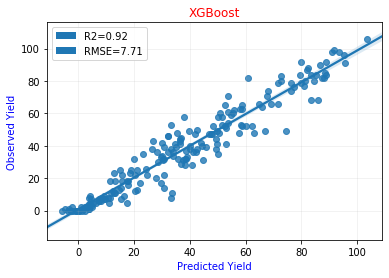

In [18]:

sn.regplot(x=predicted_yield2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
plt.grid(alpha=0.2)
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])


In [19]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe2, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.7578 ± 0.1066,alcohol_*C1_exposed_area
0.6235 ± 0.0784,alcohol_*C1_electrostatic_charge
0.3844 ± 0.2124,sulfonyl_fluoride_*F1_electrostatic_charge
0.2416 ± 0.0604,base_*N1_exposed_area
0.1597 ± 0.0160,alcohol_secondary
0.1081 ± 0.0285,alcohol_6-membered_ring
0.0890 ± 0.0100,alcohol_electronegativity
0.0479 ± 0.0285,sulfonyl_fluoride_*S1_electrostatic_charge
0.0290 ± 0.0163,alcohol_alpha-carbonyl
0.0221 ± 0.0145,alcohol_cyclic
